In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

plt.rcParams['figure.figsize'] = [20, 10]

In [6]:
df = pd.read_csv("input.csv")
df.head()

,date,ticker,name,sector,industry,country,marketCap,price,change,volume
0,2022-03-22T00:00:00.0000000,TCN,Tricon Residential Inc.,Real Estate,Real Estate Services,Canada,0.0,17.01,0.0,0
1,2022-03-22T00:00:00.0000000,UNVR,Univar Solutions Inc.,Basic Materials,Chemicals,USA,0.0,33.78,0.0,0
2,2022-03-22T00:00:00.0000000,LNTH,"Lantheus Holdings, Inc.",Healthcare,Diagnostics & Research,USA,0.0,55.69,0.0,0
3,2022-03-22T00:00:00.0000000,TRTN,Triton International Limited,Industrials,Rental & Leasing Services,Bermuda,0.0,71.41,0.0,0
4,2022-03-22T00:00:00.0000000,IRTC,"iRhythm Technologies, Inc.",Healthcare,Medical Instruments & Supplies,USA,0.0,145.47,0.0,0


In [7]:
df['date'] = pd.to_datetime(df['date'])
df.drop(df[df["marketCap"] == 0].index, inplace=True)

In [8]:
df.head()

,date,ticker,name,sector,industry,country,marketCap,price,change,volume
98,2022-04-01,TECK,Teck Resources Limited,Basic Materials,Other Industrial Metals & Mining,Canada,2.176000e+10,42.15,4.35,4621608
99,2022-04-01,NEX,NexTier Oilfield Solutions Inc.,Energy,Oil & Gas Equipment & Services,USA,2.250000e+09,10.07,9.04,2926285
100,2022-04-01,SBS,Companhia de Saneamento Basico do Estado de Sa...,Utilities,Utilities - Regulated Water,Brazil,6.840000e+09,10.56,7.43,2849200
101,2022-04-01,ARLP,"Alliance Resource Partners, L.P.",Energy,Thermal Coal,USA,1.950000e+09,15.49,0.42,1493801
102,2022-04-01,GLNG,Golar LNG Limited,Energy,Oil & Gas Midstream,Bermuda,2.460000e+09,25.29,2.06,1306556


In [9]:
groupedByTicker = df.groupby("ticker")

df["number_of_appearances"] = groupedByTicker["date"].transform("count")
df["max_price"] = groupedByTicker["price"].transform("max")
df["min_price"] = groupedByTicker["price"].transform("min")
df["earliest_date"] = groupedByTicker["date"].transform("min")
df["latest_date"] = groupedByTicker["date"].transform("max")
df["price_change"] = (df["max_price"] - df["min_price"]) / df["min_price"]

new_highs_with_p_clean = df[df["price_change"] > 0].groupby("ticker").first()

In [10]:
print("number of tickers with all time highs: ",len(df["ticker"].unique()))
print("number of winning tickers: ", len(new_highs_with_p_clean.index))


win_rate = len(new_highs_with_p_clean.index) / len(df["ticker"].unique())

print("Win rate: ", round(win_rate * 100, 2), "%")

reward = new_highs_with_p_clean["price_change"].median()
risk = 0.05

print("Reward: ", reward)
print("Risk: ", risk)
print("R:R = ", round(reward / risk, 2))

position_size = 3000

# expected value
ev = position_size * reward * win_rate - position_size * risk * (1 - win_rate)
print("EV: ", round(ev, 2))


number of tickers with all time highs:  183
number of winning tickers:  72
Win rate:  39.34 %
Reward:  0.05441348433777223
Risk:  0.05
R:R =  1.09
EV:  -26.76


<AxesSubplot:xlabel='industry'>

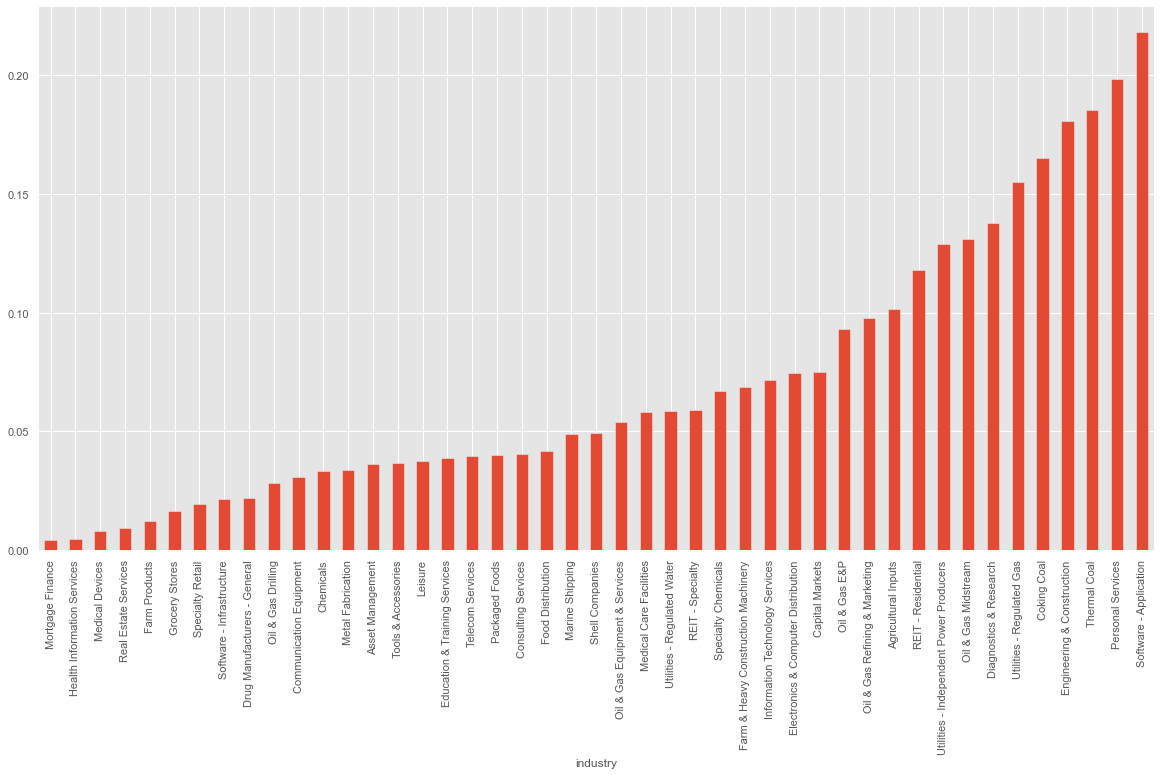

In [11]:
new_highs_with_p_clean.groupby("industry")["price_change"].median().sort_values().plot(kind="bar")

In [12]:
new_highs_with_p_clean[new_highs_with_p_clean["industry"] == "Coking Coal"]

,date,name,sector,industry,country,marketCap,price,change,volume,number_of_appearances,max_price,min_price,earliest_date,latest_date,price_change
ticker,,,,,,,,,,,,,,,
AMR,2022-04-12,"Alpha Metallurgical Resources, Inc.",Basic Materials,Coking Coal,USA,2.550000e+09,142.08,10.11,1077969,3,165.54,142.08,2022-04-12,2022-05-05,0.165118


<AxesSubplot:title={'center':'price_change'}, xlabel='sector'>

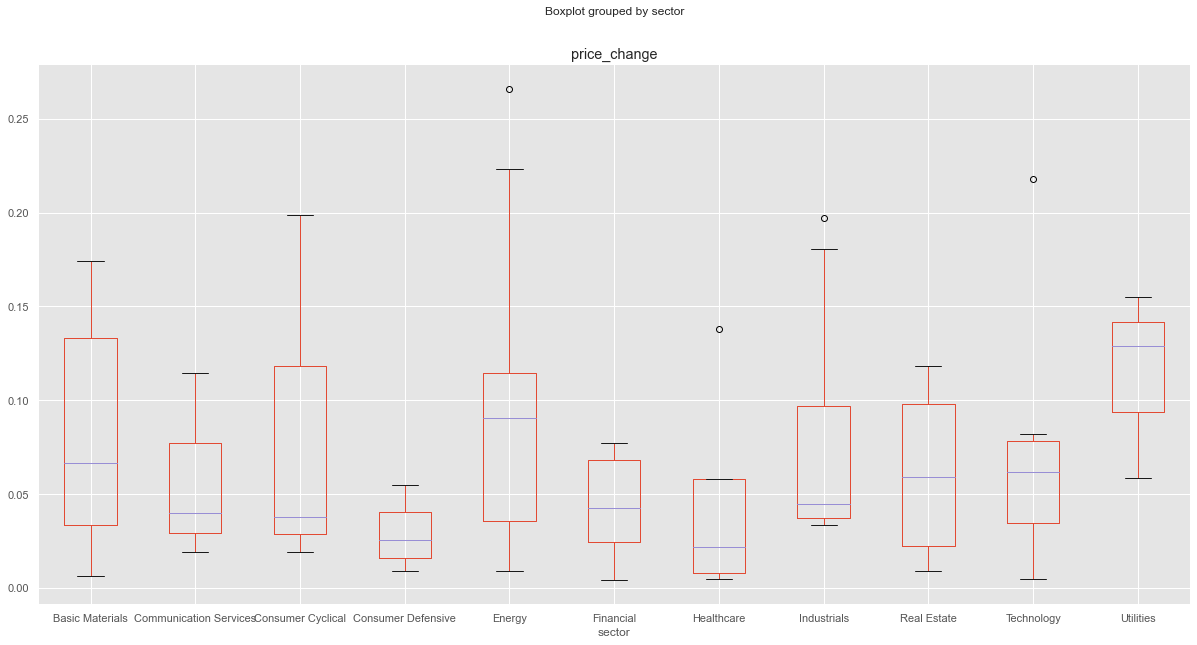

In [13]:
new_highs_with_p_clean.boxplot(column="price_change", by="sector")